# Assignment 4

## Problem Formulation: ✍
* We need to predict the price and type of apartment/house for a new host. 

### Input:
* Text data and images data, as there is a summary for the apartment/house in text type. Besides, image for the apartment/house. Part of the dataset has 2 labels which are type and price (training dataset), and part doesn't contain the labels (test dataset). Type column consists from 24 unique values, and price consists from 3 unique values which refer to beginner, plus, premium.

### Output:
* We need to predict the price and type of apartment/house for a new host according to the given inputs which we train the model on with the training dataset. Then predict the requirements with test the model on the test dataset.


## What data mining function is required? 🕵🏽
* In this assignment we need "classification and prediction" data mining function.

## What could be the challenges? 😕
* Challenges are: how to make good preprocessing steps for the text data and images data. How to deal with two inputs to the neural networks. How to predict two outputs from the neural network. How to construct a good neural network that is suitable for our dataset and problem. How to make tuning for the number of the vocabulary size, max length for each sentence, and some parameters in the neural network. In addition to how to develop a successful solution for the problem and make good predictions to predict the right price category and type for the apartment/house.


## What is the impact? 🤓
* The impact is to know more about preprocessing for the data, deal with text data, deal with images, and deal with the neural networks, choose good construction for the layers and tuning their hyperparameters. Besides, know more about Multi-modality learning - Multi-objective learning. So, by constructing a good neural network, this would give the predictions for the price category and the type for the apartment/house. So, this would be more helpful for the new hosts.


## What is an ideal solution? 🦸
* The ideal solution is to make a very good neural network that deals with Multi-modality learning - Multi-objective learning. So, by the good network, this will give perfect performance parameters, and this happens after making good preprocessing steps on the text data and the images data. So, the model can predict and classify in a right way the price category and type for the apartment/house.


## What is the experimental protocol used and how was it carried out? 🤔
* I used the holdout method. So, in the holdout method I give the neural network the size of the validation set so it splits the training dataset into training and validation datasets. So, the network starts in training the model on the training dataset and gets the validation performance and applying the trained model on the validation dataset. So, by this I get the performane on the training and validation to see whether the model started to overfit on the training dataset or not. The performance is given by the accuracy and the loss of the model.


## How did we tune hyper-parameters in the template? 
* The tuning for the hyperparameters is done by the backpropagation in each layer. As each model makes backpropagation to get the gradients to update the weights and parameters that are used in the model.
* That was the tuning in the parameters and weights for each model. So, in addition to this I tuned some parameters like vocabulary size, max length for each sentence, number of epochs, and the batch size by trial and error. As I tried many different numbers for them and get the best one that gives the best result with using the same model without any changes. So, I could choose the one which gives the best results for each of them.


## What is the search space and what is the criteria to determine good/bad hyper-parameters?
* Search space is the space of all feasible, and possible solutions we have to make good hyperparameters tuning. Each point in the search space is one possible solution, and each possible solution can be pointed by its fitness for our problem. As I didn't use a specific tool to search for the best hyperparameters. I used trial and error method to tune the max_length for each sentence, vocabulary size, number of epochs, and batch size. I tried different values for each one on the same model, so the changes only in those hyperparameters, and get the best combination for them that gives the best results on that model.
* The criteria to determine whether the hyperparameters are good or bad is: by monitor the accuracy and the loss between the training and validation, so we can figure out if the model starts to overfit the training dataset or not. Then, compare the resultant accuracy with the accuracy that we get from Kaggle, if it is good with the training data, and validation data but it is bad, and gets bad accuracy on Kaggle from predictions on the unseen dataset "test dataset", so this means the hyperparameters are bad. As they don't give a good results from the unseen dataset.

  That was for the weights and parameters that are used in the models, and for the other hyperparameters as I talked before I tuned them by trial and error, and continue my work with the one which gave me the best results.

## What preprocessing steps are used? 
* I made two preprocessing techniques one on the text data, and one on the images data:
    * First one for the text data: translate all sentences in different languages into English -  get any number of white spaces with single white space - remove html tags - remove any letter not written in English language - remove any single character that has space before it and space after it - make word tokenization and split the sentences into tokens - make all letters in lowercase - make lemmatization for all words if it is not stop word (means the process of consider the context and converts the word to its meaningful base form) - remove the stop words.
    * Second one for the images: convert all images to be in grayscale -  make all images in the same size 64x64.


# Import the required libraries

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os

import pandas as pd
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
import os
import numpy as np

from ast import literal_eval
from tensorflow.keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from tensorflow.keras.layers import LSTM 

import collections
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from pprint import pprint

from tensorflow.keras.layers import GRU

# Data preparation and preprocessing
## Read the training dataset

In [3]:
# read the training csv file and put it in a dataframe
df_train = pd.read_csv('train_xy.csv')
df_train

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,Apartment,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,Apartment,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,Apartment,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,Apartment,0


In [3]:
# display the information of the training dataframe to see it there are null values in any column
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


In [4]:
# convert the labels in the type column from categorical data into numerical data
df_train['type'] = df_train.type.astype('category').cat.codes

# get the number of the unique values for both of our labels (type - price) to be used in the output layer in our network
len_type = len(df_train.type.unique())
len_price = len(df_train.price.unique())

# display the training dataframe to make sure that the type column is now numerical
df_train

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0
...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,1,0
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,1,2
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,1,1
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,1,0


In [5]:
# display the number of the unique values in the type column
len_type

24

In [6]:
# display the number of the unique values in the price column
len_price

3

In [7]:
# fill the null values in the dataframe by forward filling method
df_train = df_train.ffill()

# display the information of the training dataframe to make sure that there are no null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7627 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   int8  
 3   price    7627 non-null   int64 
dtypes: int64(1), int8(1), object(2)
memory usage: 186.3+ KB


In [8]:
# translate all sentences in the summary column into english to make all in the same language

from googletrans import Translator
translator = Translator()

df_train['translate_summary'] = df_train['summary'].apply(lambda x: translator.translate(x, lang_tgt= 'en'))

In [9]:
# display the first 5 rows to check the translation column
df_train.head()

,summary,image,type,price,translate_summary
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1,"Translated(src=en, dest=en, text=Spacious, sun..."
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0,"Translated(src=en, dest=en, text=Located in on..."
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1,"Translated(src=fr, dest=en, text=Pretty and co..."
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1,"Translated(src=en, dest=en, text=Beautiful and..."
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0,"Translated(src=fr, dest=en, text=Very large ''..."


In [4]:
# preprocess image data by make resize of each image and convert it to grayscale
def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64, 2))
    return arr


# loading images and apply the processing function on each image
x_train_image = np.array([load_image(i) for i in tqdm(df_train.image)])

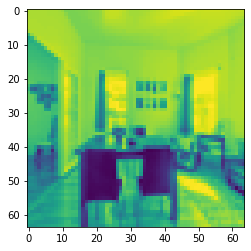

In [5]:
# check image loading and display the zero index image 
import matplotlib.pyplot as plt
plt.imshow(x_train_image[0, :, :, 0])

In [12]:
# get the two labels that we will work with
# get type 
y_train_type = df_train.type

# get price
y_train_price = df_train.price

In [14]:
# prepare the cleaning function for the text data
import nltk 
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# define our lemmatizer by English language as our dataset in English language after translation
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

# get the stopwords from the nltk library by English language as our dataset in English language
stop_words = set(stopwords.words("english"))

# define the first preprocessing function
def preprocessing_1(text):
    """ steps:
        - remove any html tags (< /br> often found)
        - Keep only ASCII + European Chars and whitespace
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        - remove stopwords, punctuation and stemm
    """
    # get any number of white spaces with single white space
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    # get html tages
    RE_TAGS = re.compile(r"<[^>]+>")
    # get any letter not written in English way
    RE_ASCII = re.compile(r"[^A-Za-z0-9 ]", re.IGNORECASE)
    # get any single character that has space before it and space after it
    RE_SINGLECHAR = re.compile(r"\b[A-Za-zÀ-ž]\b", re.IGNORECASE)
    
    # romove anything from the above with space and the text after what will be removed
    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)
    
    # make word tokenization and split the sentences into tokens
    word_tokens = word_tokenize(text)
    # convert any capital letter with its small letter to make all of the letters small
    words_tokens_lower = [word.lower() for word in word_tokens]

    # remove stop words
    words_filtered = [
        word for word in words_tokens_lower if word not in stop_words
    ]
    
    # Lemmatization
    Lemm_new_word = []
    for word in words_filtered:
        Lemm_new_word.append(lemmatizer.lemmatize(word))

    # make joining for all words in any sentence to make them one sentence again
    text_clean = " ".join(Lemm_new_word)
    return text_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [15]:
# add new column by the size of the summary column to be used to insert in it the text translated
df_train['translate_summary_text'] = df_train['summary']

In [16]:
# get the text attribute in the translate_summary column to be cleaned as I need to clean the text only
for i in range(len(df_train["translate_summary"])):
    df_train['translate_summary_text'][i] = df_train['translate_summary'][i].text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# check the dataframe after adding the translated column
df_train

,summary,image,type,price,translate_summary,translate_summary_text
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1,"Translated(src=en, dest=en, text=Spacious, sun...","Spacious, sunny and cozy modern apartment in t..."
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0,"Translated(src=en, dest=en, text=Located in on...",Located in one of the most vibrant and accessi...
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1,"Translated(src=fr, dest=en, text=Pretty and co...",Pretty and cozy accommodation 10 minutes from ...
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1,"Translated(src=en, dest=en, text=Beautiful and...","Beautiful and spacious (1076 sc ft, / 100 mc) ..."
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0,"Translated(src=fr, dest=en, text=Very large ''...",Very large ''rustic'' and very pleasant apartm...
...,...,...,...,...,...,...
7622,"Un grand logement 4 et 1/2, tout inclut, bien ...",img_train/7626.jpg,1,0,"Translated(src=fr, dest=en, text=A large 4 and...","A large 4 and 1/2 apartment, all inclusive, we..."
7623,Magnificent condo directly on the river. You w...,img_train/7627.jpg,1,2,"Translated(src=en, dest=en, text=Magnificent c...",Magnificent condo directly on the river. You w...
7624,This apartment is perfect for anyone visiting ...,img_train/7628.jpg,1,1,"Translated(src=en, dest=en, text=This apartmen...",This apartment is perfect for anyone visiting ...
7625,"It is a cozy ,clean ,and comfortable apartment...",img_train/7629.jpg,1,0,"Translated(src=en, dest=en, text=It is a cozy ...","It is a cozy ,clean ,and comfortable apartment..."


In [18]:

import re
# Clean text in the training dataset and insert the clean text in new column
df_train["summary_clean"] = df_train.loc[df_train["translate_summary_text"].str.len() > 0, "translate_summary_text"]
df_train["summary_clean"] = df_train["summary_clean"].map(
    lambda x: preprocessing_1(x) if isinstance(x, str) else x
)

In [19]:
# # loading summary after cleaning and apply the preprocessing on it
x_train_text = df_train.summary_clean.astype('str')
# x_train_text = df_train.summary.astype('str')

In [20]:
# preprocess text data after translate and clean it
# define the vocabulary size that I will work on so the algorithm will work on the most 30000 frequent word
vocab_size = 30000
# define the maximum length for each sentence to make all sentences with the same size 
max_len = 100


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text)

# define the preprocessing function by making all sentences in the same size and if one is taller it remove the words from the 
# back of the sentence and if one is shorter it add zero padding after the last word in the sentence untill reach max_len
def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),
        maxlen=max_len,
        padding='post',
    )
    

# padding is done inside: 
x_train_text_id = _preprocess(x_train_text)

print(x_train_text_id.shape)

(7627, 100)


In [21]:
# we can use the tokenizer to convert IDs to words.
# print in a better organize print way the first 5 sentences after finishing the preprocessing
pprint(tokenizer.sequences_to_texts(x_train_text_id[:5]))

['spacious sunny cozy modern apartment heart montreal 3 bedroom centrally '
 'located popular plateau mont royal neighborhood middle prince arthur '
 'pedestrian street close amenity restaurant coffee house bar club shopping '
 'university subway station experience montreal like real local resident heart '
 'action grand prix week grill saint laurent festival mural 2019 much',
 'located one vibrant accessible location downtown montreal one bedroom condo '
 'impress leave one memorable experience walking distance popular sainte '
 'catherine street bell center old port lachine canal bonaventure metro much '
 'much',
 'pretty cozy accommodation 10 minute downtown montreal grocery store pharmacy '
 'saq restaurant public transport nearby two closed bedroom accommodate 4 '
 'adult',
 'beautiful spacious 1076 sc ft 100 mc condo 1th floor west island montreal '
 'located quiet residential area near number superb green space 3 min car '
 'highway 13 40 7 min le march de ouest 15 min airport 6

## Read the test dataset

In [22]:
# read the test csv file and put it in a dataframe
df_test = pd.read_csv('test_x.csv', index_col='id')
df_test

,summary,image
id,,
0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg
...,...,...
7626,"Large, fully-furnished flat with brick walls a...",img_test/7627.jpg
7627,Logement situé dans le haut d’un duplex. Vivez...,img_test/7628.jpg
7628,"My place is close to parks, . My place is good...",img_test/7629.jpg


In [23]:
# display the information of the training dataframe to see it there are null values in any column
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7360 entries, 0 to 7630
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7360 non-null   object
 1   image    7360 non-null   object
dtypes: object(2)
memory usage: 172.5+ KB


In [24]:
# as there is no nan values I will make translate for the sentences
# translate all sentences in the summary column into english to make all in the same language

from googletrans import Translator
translator = Translator()

df_test['translate_summary'] = df_test['summary'].apply(lambda x: translator.translate(x, lang_tgt= 'en'))

In [25]:
# add new column by the size of the summary column to be used to insert in it the text translated
df_test['translate_summary_text'] = df_test['summary']

In [26]:
# get the text attribute in the translate_summary column to be cleaned as I need to clean the text only
for k in (df_test.index):
    df_test['translate_summary_text'][k] = df_test['translate_summary'][k].text

In [27]:
# check the dataframe after adding the translated column
df_test

,summary,image,translate_summary,translate_summary_text
id,,,,
0,Charming warm house is ready to host you here ...,img_test/0.jpg,"Translated(src=en, dest=en, text=Charming warm...",Charming warm house is ready to host you here ...
1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg,"Translated(src=fr, dest=en, text=The room is s...","The room is spacious and bright, in an apartme..."
2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg,"Translated(src=fr, dest=en, text=Large comfort...",Large comfortable room located in the basement...
3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg,"Translated(src=fr, dest=en, text=Near a Metro,...","Near a Metro, orange line. 10 minutes walking...."
4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg,"Translated(src=en, dest=en, text=Very bright a...",Very bright appartment and very cosy. 2 separa...
...,...,...,...,...
7626,"Large, fully-furnished flat with brick walls a...",img_test/7627.jpg,"Translated(src=en, dest=en, text=Large, fully-...","Large, fully-furnished flat with brick walls a..."
7627,Logement situé dans le haut d’un duplex. Vivez...,img_test/7628.jpg,"Translated(src=fr, dest=en, text=Accommodation...",Accommodation located at the top of a duplex. ...
7628,"My place is close to parks, . My place is good...",img_test/7629.jpg,"Translated(src=en, dest=en, text=My place is c...","My place is close to parks, . My place is good..."


In [28]:
# Clean text in the test dataset and insert the clean text in new column
df_test["summary_clean"] = df_test.loc[df_test["translate_summary"].str.len() > 0, "translate_summary"]
df_test["summary_clean"] = df_test["summary_clean"].map(
    lambda x: preprocessing_1(x) if isinstance(x, str) else x
)

In [29]:
# loading images and apply the preprocessing on each image
x_test_image = np.array([load_image(i) for i in tqdm(df_test.image)])


  0%|          | 0/7360 [00:00<?, ?it/s]

In [30]:
# loading the summary after cleaning and apply the preprocessing on it
x_test_text = _preprocess(df_test.summary_clean.astype('str'))
# x_test_text = _preprocess(df_test.summary.astype('str'))

## Implement the plot functions to plot the results from each trial

In [31]:
def plt_function_single_op(history):
# split the horizontal area to draw the three plots horizontaly
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  fig.suptitle('Model Results')
  
  # plot the price accuracy through the training and validation
  ax1.plot(history.history['sparse_categorical_accuracy'])
  ax1.plot(history.history['val_sparse_categorical_accuracy'])
  ax1.set_title('Price accuracy')
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  ax1.legend(['price_training', 'price_validation'], loc='upper left')

  # plot the loss through the training and validation
  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('Model loss')
  ax2.set_ylabel('Loss')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'validation'], loc='upper left')

In [32]:
def plt_function_multi_op(history):
# split the horizontal area to draw the three plots horizontaly
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
  fig.suptitle('Model Results')
  
  # plot the price accuracy through the training and validation
  ax1.plot(history.history['price_sparse_categorical_accuracy'])
  ax1.plot(history.history['val_price_sparse_categorical_accuracy'])
  ax1.set_title('Price accuracy')
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('Epoch')
  ax1.legend(['price_training', 'price_validation'], loc='upper left')

  # plot the type accuracy through the training and validation
  ax2.plot(history.history['type_sparse_categorical_accuracy'])
  ax2.plot(history.history['val_type_sparse_categorical_accuracy'])
  ax2.set_title('Type accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['type_training', 'type_validation'], loc='upper left')

  # plot the loss through the training and validation
  ax3.plot(history.history['loss'])
  ax3.plot(history.history['val_loss'])
  ax3.set_title('Model loss')
  ax3.set_ylabel('Loss')
  ax3.set_xlabel('Epoch')
  ax3.legend(['train', 'validation'], loc='upper left')

# Starting the trials

## 1 . Using the text data only (single-modality learning - single-objective learning).
I will train the model on the text data and predict the price only with using softmax activation on the output layer as it is multi class classification, by making training for the model on the training dataset with making 60 epochs which means 60 iteration over the training dataset, taking in each iteration 128 sample point (batch size), with splitting the training into train and validation by making the validation size = 20%, and put early stopping to monitor the val_loss if it increased 5 times the model stops the training, as this means the model started to overfit the training part. I will use Adam optimizer in all trial which combines the best properties of the AdaGrad and RMSProp algorithms, as it use momentum and it is adaptive, to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [33]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

# one input layer for text data 
in_text = keras.Input(batch_shape=(None, max_len))

# text part
# simple average of embedding layer that takes the input with the vacab size and max_len
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# add a dense layer to make the classification with softmax activation as it is multi class classification
p_price = Dense(len_price, activation='softmax', name='price')(averaged)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
    },
    outputs={
        'price': p_price,
    },
)


# compile model with optimizer, loss values for the predicting price task and metrics is accuracy
model.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
    },
)

# display the model with the layers and number of parameters in each layer
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          3000000   
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 100)              0         
 mbda)                                                           
                                                                 
 price (Dense)               (None, 3)                 303       
                                                                 
Total params: 3,000,303
Trainable params: 3,000,303
Non-trainable params: 0
_________________________________________________________________


In [34]:
# make training for the model on the training dataset with making 60 epochs which means 60 iteration over the training dataset,
# take in each iteration 128 sample point (batch size), with splitting the training into train and validation by making the 
# validation size = 20%, put early stopping to monitor the val_loss
history = model.fit(
    x={
        'summary': x_train_text_id,
    },
    y={
        'price': y_train_price,
    },
    epochs=60,
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/60
48/48 [==============================] - 4s 13ms/step - loss: 0.9977 - sparse_categorical_accuracy: 0.5948 - val_loss: 0.8977 - val_sparse_categorical_accuracy: 0.6252
Epoch 2/60
48/48 [==============================] - 0s 10ms/step - loss: 0.8531 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8229 - val_sparse_categorical_accuracy: 0.6252
Epoch 3/60
48/48 [==============================] - 0s 9ms/step - loss: 0.8163 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8088 - val_sparse_categorical_accuracy: 0.6252
Epoch 4/60
48/48 [==============================] - 0s 9ms/step - loss: 0.8022 - sparse_categorical_accuracy: 0.6248 - val_loss: 0.7986 - val_sparse_categorical_accuracy: 0.6311
Epoch 5/60
48/48 [==============================] - 0s 9ms/step - loss: 0.7875 - sparse_categorical_accuracy: 0.6263 - val_loss: 0.7872 - val_sparse_categorical_accuracy: 0.6343
Epoch 6/60
48/48 [==============================] - 0s 9ms/step - loss: 0.7704 - sparse_categorical_accuracy

In [35]:
# make model prediction on the text data in the test data set, and get the max class probability to be the predicted class
y_predict = model.predict(
    {
        'summary': x_test_text,
    }
)

# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[0.689332   0.2584868  0.05218111]
 [0.689332   0.2584868  0.05218111]
 [0.689332   0.2584868  0.05218111]
 ...
 [0.689332   0.2584868  0.05218111]
 [0.689332   0.2584868  0.05218111]
 [0.689332   0.2584868  0.05218111]]
[0 0 0 ... 0 0 0]


In [36]:
# save the predicted into CSV file
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('trial single.csv', index=False)

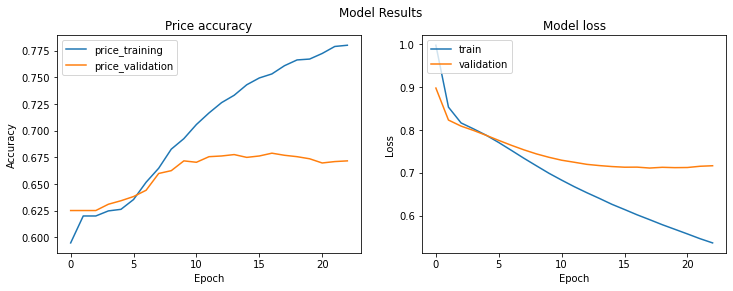

In [37]:
plt_function_single_op(history)

## Thoughts and observation:
This gave a score on Kaggle = 0.68885.

I thought that this model will be suitable, and give a good results, and that what happened. As the number of the batch size wasn't small. Besides, I prevented the overfitting on the training dataset by monitoring the validation loss value which is the loss value on the validation dataset. Then, wait if the validation loss increased 5 times, the model stops the training, and use the final gradients it reached in the prediction on the text after cleaning and translating it to be useful and in one language. So, by training the model I reached accuracy on the validation set = 0.6717, and the resultant accuracy on Kaggel is 0.68885. So, this means they are close to each other, and there is no overfitting or underfitting in the model. Besides, from the above graphs we can see that when the model started to overfit the training data, and its loss in training got very small in compare with the validation loss, the model stoped at epoch 23 to prevent worse results.

## Plan for the next trial:
I will continue working on the text data as the input of the model, and predict one output which is the price.
I will add LSTM layer (Long Short-Term Memory layer) after the embedding layer to deal with the text data, after making spatial dropout for some neurons, and spatial means in the same time step not random dropout. With making the dimensionality of the output space of the LSTM layer be 128, we can also make dropout for some neurons in the LSTM by setting the dropout value.

## 2. Using the text data only with adding LSTM layer (single-modality learning - single-objective learning).

In [38]:
drop_embed = 0.2 
n_lstm = 128
# drop_lstm = 0.2

# one input layer for text data 
in_text = keras.Input(batch_shape=(None, max_len))

# text part
# simple embedding layer that takes the input with the vacab size and max_len then spatial dropout layer then LSTM layer
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
SDO1D = SpatialDropout1D(drop_embed)(embedded)
lstm = LSTM(n_lstm)(SDO1D)
# lstm = LSTM(n_lstm, dropout=drop_lstm)(SDO1D)


# add a dense layer to make the classification with softmax activation as it is multi class classification
p_price = Dense(len_price, activation='softmax', name='price')(lstm)


# define model input/output using keys.
model_lstm = keras.Model(
    inputs={
        'summary': in_text,
    },
    outputs={
        'price': p_price,
    },
)


# compile model with optimizer, loss values for the predicting price task and metrics is accuracy
model_lstm.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
    },
)

# display the model with the layers and number of parameters in each layer
model_lstm.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 100)          3000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 price (Dense)               (None, 3)                 387       
                                                                 
Total params: 3,117,635
Trainable params: 3,117,635
Non-trainable params: 0
_________________________________________________

In [39]:
# make training for the model on the training dataset with making 60 epochs which means 60 iteration over the training dataset,
# take in each iteration 128 sample point (batch size), with splitting the training into train and validation by making the 
# validation size = 20%, put early stopping to monitor the val_loss
history = model_lstm.fit(
    x={
        'summary': x_train_text_id,
    },
    y={
        'price': y_train_price,
    },
    epochs=60,
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/60
48/48 [==============================] - 6s 46ms/step - loss: 0.8639 - sparse_categorical_accuracy: 0.6119 - val_loss: 0.8304 - val_sparse_categorical_accuracy: 0.6252
Epoch 2/60
48/48 [==============================] - 1s 31ms/step - loss: 0.8393 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8327 - val_sparse_categorical_accuracy: 0.6252
Epoch 3/60
48/48 [==============================] - 1s 31ms/step - loss: 0.8387 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8300 - val_sparse_categorical_accuracy: 0.6252
Epoch 4/60
48/48 [==============================] - 2s 31ms/step - loss: 0.8390 - sparse_categorical_accuracy: 0.6202 - val_loss: 0.8300 - val_sparse_categorical_accuracy: 0.6252
Epoch 5/60
48/48 [==============================] - 2s 32ms/step - loss: 0.8432 - sparse_categorical_accuracy: 0.6202 - val_loss: 0.8402 - val_sparse_categorical_accuracy: 0.6252
Epoch 6/60
48/48 [==============================] - 1s 31ms/step - loss: 0.8383 - sparse_categorical_accu

In [40]:
# make model prediction on the text data in the test data set, and get the max class probability to be the predicted class
y_predict = model_lstm.predict(
    {
        'summary': x_test_text,
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)


[[0.66429496 0.28563347 0.05007157]
 [0.66429496 0.28563347 0.05007157]
 [0.66429496 0.28563347 0.05007157]
 ...
 [0.66429496 0.28563347 0.05007157]
 [0.66429496 0.28563347 0.05007157]
 [0.66429496 0.28563347 0.05007157]]
[0 0 0 ... 0 0 0]


In [41]:
# save the predicted into CSV file
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('trial lstm.csv', index=False)


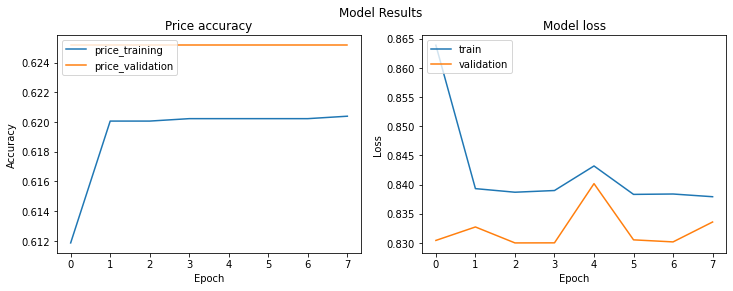

In [42]:
plt_function_single_op(history)

## Thoughts and observation:
This gave a score on Kaggle = 0.62038

I thought that this model won't give a good results as the LSTM layer doesn't have a good effect on the model, and that what happened. As the number of the batch size wasn't small. Besides, I prevented the overfitting on the training dataset by monitoring the validation loss value which is the loss value on the validation dataset. Then, wait if the validation loss increased 5 times, the model stops the training, and use the final gradients it reached in the prediction on the text after cleaning and translating it to be useful and in one language. But from the above figures, we can figure out that the loss started in a high value on the training, and on the validation it didn't change alot or even to be decreased. But we can see after the 7th epoch, it started to increase more on the validation dataset. So,this approves that the LSTM didn't work well with this problem with my preprocessing steps I made. So, by training the model I reached accuracy on the validation dataset = 0.6252, and the resultant accuracy on Kaggel is 0.62038. So, this means they are close to each other, and there is no overfitting in the model as it gave a close results in the training phase and in the test phase. Besides, this approves that the LSTM didn't work good on the data after I made those preparation and preprocessing steps I made.

## Plan for the next trial:
I will continue working on the text data as the input of the model, and predict one output which is the price.
I will add 2 LSTM layer (Long Short-Term Memory layer) after the embedding layer to deal with the text data, so this will be bidirectional layers as one from them will move forward, and the other will move backward. With making the dimensionality of the output space of both of the LSTM layer be 64, we can also make dropout for some neurons in the LSTM by setting the dropout value. With making the first LSTM layer return the sequences, so we can work on the next one by backward way.

## 3. Using the text data only with adding two layers "BiDirectional layers" (single-modality learning - single-objective learning).


In [43]:
# one input layer for text data 
in_text = keras.Input(batch_shape=(None, max_len))

# text part
# simple average of embedding layer that takes the input with the vacab size and max_len 
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
# Add 2 bidirectional LSTMs one will move forward and the next will move backward
x = keras.layers.Bidirectional(LSTM(64, return_sequences=True))(embedded)
x = keras.layers.Bidirectional(LSTM(64))(x)


# add a dense layer to make the classification with softmax activation as it is multi class classification
p_price = Dense(len_price, activation='softmax', name='price')(x)


# define model input/output using keys.
model_Bi = keras.Model(
    inputs={
        'summary': in_text,
    },
    outputs={
        'price': p_price,
    },
)


# compile model with optimizer, loss values for the predicting price task and metrics is accuracy
model_Bi.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
    },
)

# display the model with the layers and number of parameters in each layer
model_Bi.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 100)          3000000   
                                                                 
 bidirectional (Bidirectiona  (None, 100, 128)         84480     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 price (Dense)               (None, 3)                 387       
                                                                 
Total params: 3,183,683
Trainable params: 3,183,683
Non-tra

In [44]:
# make training for the model on the training dataset with making 60 epochs which means 60 iteration over the training dataset,
# take in each iteration 128 sample point (batch size), with splitting the training into train and validation by making the 
# validation size = 20%, put early stopping to monitor the val_loss
history = model_Bi.fit(
    x={
        'summary': x_train_text_id,
    },
    y={
        'price': y_train_price,
    },
    epochs=60,
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/60
48/48 [==============================] - 12s 117ms/step - loss: 0.8414 - sparse_categorical_accuracy: 0.6148 - val_loss: 0.7594 - val_sparse_categorical_accuracy: 0.6481
Epoch 2/60
48/48 [==============================] - 4s 82ms/step - loss: 0.6771 - sparse_categorical_accuracy: 0.7059 - val_loss: 0.7288 - val_sparse_categorical_accuracy: 0.6514
Epoch 3/60
48/48 [==============================] - 4s 82ms/step - loss: 0.5796 - sparse_categorical_accuracy: 0.7618 - val_loss: 0.7600 - val_sparse_categorical_accuracy: 0.6645
Epoch 4/60
48/48 [==============================] - 4s 81ms/step - loss: 0.4929 - sparse_categorical_accuracy: 0.8063 - val_loss: 0.7957 - val_sparse_categorical_accuracy: 0.6311
Epoch 5/60
48/48 [==============================] - 4s 83ms/step - loss: 0.4125 - sparse_categorical_accuracy: 0.8415 - val_loss: 0.8646 - val_sparse_categorical_accuracy: 0.6147
Epoch 6/60
48/48 [==============================] - 4s 82ms/step - loss: 0.3505 - sparse_categorical_ac

In [45]:
# make model prediction on the text data in the test data set, and get the max class probability to be the predicted class
y_predict = model_Bi.predict(
    {
        'summary': x_test_text,
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)


[[0.33469242 0.564929   0.1003786 ]
 [0.33469242 0.564929   0.1003786 ]
 [0.33469242 0.564929   0.1003786 ]
 ...
 [0.33469242 0.564929   0.1003786 ]
 [0.33469242 0.564929   0.1003786 ]
 [0.33469242 0.564929   0.1003786 ]]
[1 1 1 ... 1 1 1]


In [46]:
# save the predicted into CSV file
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('trial bi.csv', index=False)
# 0.48260

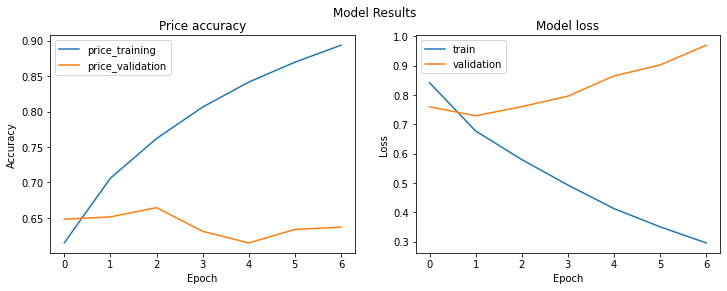

In [47]:
plt_function_single_op(history)

## Thoughts and observation:
This gave a score on Kaggle = 0.48260.

I thought that this model will work better than the previous one due to using the bidirectional layers, so they will work better than one LSTM layer due to their mechanism. But this didn't happen as the model was overfitting on the training dataset, and we can see this from the above graphs and the accuracy I got in the training phase. Although the number of the batch size wasn't small, It didn't give a good results. I tried to prevent the overfitting on the training dataset by monitoring the validation loss value which is the loss value on the validation dataset. But the loss was actually high from the beginning in the validation loss. Then, after waiting if the validation loss increased 5 times, the model stops the training, and use the final gradients it reached in the prediction on the text after cleaning and translating it to be useful and in one language. The loss was already high, and the accuracy wasn't good. So, by training the model I reached accuracy = 0.6370, and the resultant accuracy on Kaggel is 0.4826. So, this means the Bidirectional layers didn't meet my expectations, and there is overfitting in the training phase.

## Plan for the next trial:
I will work on the image data. I will use 2 layers to extract the features from the images after making preprocessing on them. I will use convolution layer by 400 hidden layers and filter size = 16x16, then use max pooling layer by window size = 16x16, so it gets the max value from the window of the max pooling.

## 4. Using the image data only with convolution and max pooling layers (single-modality learning - single-objective learning).


In [48]:
# one input layer for image data 
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# image part 
# simple conv2d layer with 400 hidden layers and filter size 16x16 then max pooling layer with window size 16x16
cov = Conv2D(400, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)

# make flatten for the output of the max pooling so we can use it to the dense layer
flattened = Flatten()(pl)

# add a dense layer to make the classification with softmax activation as it is multi class classification
p_price = Dense(len_price, activation='softmax', name='price')(flattened)


# define model input/output using keys.
model_conv = keras.Model(
    inputs={
        'image': in_image
    },
    outputs={
        'price': p_price,
    },
)


# compile model with optimizer, loss values for the predicting price task and metrics is accuracy
model_conv.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
    },

    metrics={
        'price': ['SparseCategoricalAccuracy'],
    },
)

# display the model with the layers and number of parameters in each layer
model_conv.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 2)]       0         
                                                                 
 conv2d (Conv2D)             (None, 49, 49, 400)       205200    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 400)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3600)              0         
                                                                 
 price (Dense)               (None, 3)                 10803     
                                                                 
Total params: 216,003
Trainable params: 216,003
Non-trainable params: 0
_____________________________________________________

In [49]:
# make training for the model on the training dataset on the image data with making 60 epochs which means 60 iteration over the
# training dataset, take in each iteration 128 sample point (batch size), with splitting the training into train and validation
# by making the validation size = 20%, put early stopping to monitor the val_loss
history = model_conv.fit(
    x={
        'image': x_train_image
    },
    y={
        'price': y_train_price,
    },
    epochs=60,
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/60
48/48 [==============================] - 18s 229ms/step - loss: 0.8862 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8311 - val_sparse_categorical_accuracy: 0.6252
Epoch 2/60
48/48 [==============================] - 9s 198ms/step - loss: 0.8390 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8326 - val_sparse_categorical_accuracy: 0.6252
Epoch 3/60
48/48 [==============================] - 9s 198ms/step - loss: 0.8378 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8312 - val_sparse_categorical_accuracy: 0.6252
Epoch 4/60
48/48 [==============================] - 9s 198ms/step - loss: 0.8377 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8316 - val_sparse_categorical_accuracy: 0.6252
Epoch 5/60
48/48 [==============================] - 9s 197ms/step - loss: 0.8384 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8398 - val_sparse_categorical_accuracy: 0.6252
Epoch 6/60
48/48 [==============================] - 9s 197ms/step - loss: 0.8391 - sparse_categoric

In [50]:
# make model prediction on the image data in the test data set, and get the max class probability to be the predicted class
y_predict = model_conv.predict(
    {
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

[[0.64385074 0.29636407 0.05978518]
 [0.64385074 0.29636407 0.05978518]
 [0.64385074 0.29636407 0.05978518]
 ...
 [0.64385074 0.29636407 0.05978518]
 [0.64385074 0.29636407 0.05978518]
 [0.64385074 0.29636407 0.05978518]]
[0 0 0 ... 0 0 0]


In [51]:
# save the predicted into CSV file
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('trial image.csv', index=False)

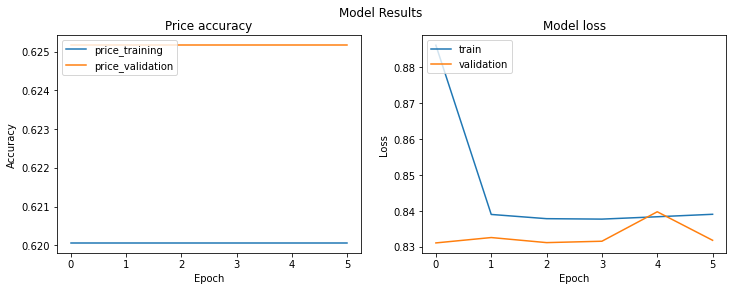

In [52]:
plt_function_single_op(history)

## Thoughts and observation:
This gave a score on Kaggle = 0.62038.

I thought working on the image data will give me a good results, and the constructed model I built will help more in this. As the number of the batch size isn't small. Besides, I prevented the overfitting on the training dataset by monitoring the validation loss value which is the loss value on the validation dataset. Then, wait if the validation loss increased 5 times, the model stops the training, and use the final gradients it reached in the prediction on the image data after applying the same preprocessing steps on the test image data. So, we can see from the results in the training phase and the graphs that there is no overfitting and the results are close to each other by small differences. So, by training the model I reached accuracy = 0.6252, and the resultant accuracy on Kaggel is 0.62038 on the unseen dataset. So, this means they are close to each other, and this approves that there is no overfitting or underfitting in the model. But on the other hand I thought this would give a better results than any trial, but I think the model needed to be better constructed to do this. But it is okay as there is no overfitting and the results are close to each one.

## Plan for the next trial:
I will work on the image data. I will use 2 layers to extract the features from the images after making preprocessing on them. I will use convolution layer by 400 hidden units and filter size = 16x16, then use max pooling layer by filter size = 16x16, so it gets the max value from the window of the max pooling. Then, using a dropout layer to turn off some neurons from the input and the hidden units randomly with rate = 25%.

## 5. Using the image data only with convolution, max pooling layers, and dropout layer (single-modality learning - single-objective learning).

In [53]:
# define the dropout rate
dropout_rate = 0.25
# one input layer for image data 
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# image part 
# simple conv2d layer with 400 hidden layers and filter size 16x16 then max pooling layer with window size 16x16 then 
# dropout layer
cov = Conv2D(400, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)
pldo = Dropout(dropout_rate)(pl)

# make flatten for the output of the max pooling so we can use it to the dense layer
flattened = Flatten()(pldo)


# add a dense layer to make the classification with softmax activation as it is multi class classification
p_price = Dense(len_price, activation='softmax', name='price')(flattened)


# define model input/output using keys.
model_do = keras.Model(
    inputs={
        'image': in_image
    },
    outputs={
        'price': p_price,
    },
)


# compile model with optimizer, loss values for the predicting price task and metrics is accuracy
model_do.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
    },
)


# display the model with the layers and number of parameters in each layer
model_do.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 2)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 400)       205200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 400)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 3, 3, 400)         0         
                                                                 
 flatten_1 (Flatten)         (None, 3600)              0         
                                                                 
 price (Dense)               (None, 3)                 10803     
                                                           

In [54]:
# make training for the model on the training dataset on the image data with making 60 epochs which means 60 iteration over the
# training dataset, take in each iteration 128 sample point (batch size), with splitting the training into train and validation
# by making the validation size = 20%, put early stopping to monitor the val_loss
history = model_do.fit(
    x={
        'image': x_train_image
    },
    y={
        'price': y_train_price,
    },
    epochs=60,
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/60
48/48 [==============================] - 10s 202ms/step - loss: 0.8927 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8319 - val_sparse_categorical_accuracy: 0.6252
Epoch 2/60
48/48 [==============================] - 9s 197ms/step - loss: 0.8381 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8314 - val_sparse_categorical_accuracy: 0.6252
Epoch 3/60
48/48 [==============================] - 9s 197ms/step - loss: 0.8391 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8352 - val_sparse_categorical_accuracy: 0.6252
Epoch 4/60
48/48 [==============================] - 9s 198ms/step - loss: 0.8392 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8337 - val_sparse_categorical_accuracy: 0.6252
Epoch 5/60
48/48 [==============================] - 10s 198ms/step - loss: 0.8378 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.8313 - val_sparse_categorical_accuracy: 0.6252
Epoch 6/60
48/48 [==============================] - 9s 198ms/step - loss: 0.8375 - sparse_categori

In [55]:
# make model prediction on the image data in the test data set, and get the max class probability to be the predicted class
y_predict = model_do.predict(
    {
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)


[[0.6051627  0.32617432 0.06866298]
 [0.6051627  0.32617432 0.06866298]
 [0.6051627  0.32617432 0.06866298]
 ...
 [0.6051627  0.32617432 0.06866298]
 [0.6051627  0.32617432 0.06866298]
 [0.6051627  0.32617432 0.06866298]]
[0 0 0 ... 0 0 0]


In [56]:
# save the predicted into CSV file
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('trial image do.csv', index=False)

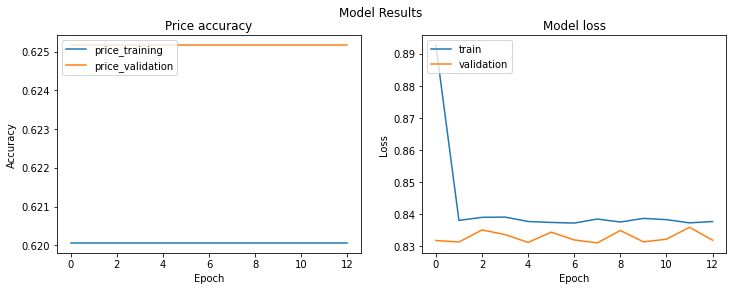

In [57]:
plt_function_single_op(history)

## Thoughts and observation:
This gave a score on Kaggle = 0.62038.

My expectations were the model will give better results from the previous one which was on image data without dropout layer. But this didn't happened as it gave a very close results to each other, the only change is the number of epochs as this trial took 13 epochs before starting to overfit the training data. But the results I got are good not bad. As the number of the batch size isn't small. Besides, I prevented the overfitting on the training dataset by monitoring the validation loss value which is the loss value on the validation dataset. Then, wait if the validation loss increased 5 times, the model stops the training, and use the final gradients it reached in the prediction on the image data after applying the same preprocessing steps on the test image data. So, we can see from the results in the training phase and the graphs that there is no overfitting and the results are close to each other by small differences. So, by training the model I reached accuracy = 0.6252, and the resultant accuracy on Kaggel is 0.62038 on the unseen dataset. So, this means they are close to each other, and this approves that there is no overfitting or underfitting in the model. But on the other hand I thought this would give a better results than the previous trial, but I think the model needed to be better constructed to do this. But it is okay as there is no overfitting and the results are close to each one.


## Plan for the next trial:
I will use two inputs (text data and image data) by using embedded layer then average the result from it with the text input, and by using 2 layers to extract the features from the images after making preprocessing on them. I will use convolution layer by 400 hidden layers and filter size = 16x16, then use max pooling layer by window size = 16x16, so it gets the max value from the window of the max pooling. Then, concatinate both parts to be used together in the dense layer to predict the output, and as I mentioned before I used softmax activation function as our problem is multi class classification.

## 6. Building a Learning model with using both inputs "text + image" data (Multi-modality learning)

In [58]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding layer that takes the input with the vacab size and max_len
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d layer with 400 hidden layers and filter size 16x16 then max pooling layer with window size 16x16
cov = Conv2D(400, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)

# make flatten for the output of the max pooling so we can use it to the dense layer
flattened = Flatten()(pl)


# combine both networks from the image's layers and text's layers
fused = tf.concat([averaged, flattened], axis=-1)

# add a dense layer to make the classification with softmax activation as it is multi class classification
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_inputs = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'price': p_price,
    },
)


# compile model with optimizer, loss values for the predicting price task and metrics is accuracy

model_inputs.compile(
    optimizer=Adam(),
    loss={
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'price': 0.5,       
    },
    metrics={
        'price': ['SparseCategoricalAccuracy'],
    },
)


# display the model with the layers and number of parameters in each layer
model_inputs.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 49, 49, 400)  205200      ['input_7[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 100, 100)     3000000     ['input_6[0][0]']                
                                                                                            

In [59]:
# make training for the model on the training dataset with making 60 epochs which means 60 iteration over the training dataset,
# take in each iteration 128 sample point (batch size), with splitting the training into train and validation by making the 
# validation size = 20%, put early stopping to monitor the val_loss, the training using the two inputs we have
history = model_inputs.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'price': y_train_price,
    },
    epochs=60,
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/60
48/48 [==============================] - 11s 208ms/step - loss: 0.4412 - sparse_categorical_accuracy: 0.6120 - val_loss: 0.4151 - val_sparse_categorical_accuracy: 0.6252
Epoch 2/60
48/48 [==============================] - 10s 204ms/step - loss: 0.4176 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.4145 - val_sparse_categorical_accuracy: 0.6252
Epoch 3/60
48/48 [==============================] - 10s 204ms/step - loss: 0.4152 - sparse_categorical_accuracy: 0.6201 - val_loss: 0.4104 - val_sparse_categorical_accuracy: 0.6252
Epoch 4/60
48/48 [==============================] - 10s 203ms/step - loss: 0.4058 - sparse_categorical_accuracy: 0.6232 - val_loss: 0.3991 - val_sparse_categorical_accuracy: 0.6324
Epoch 5/60
48/48 [==============================] - 10s 206ms/step - loss: 0.3929 - sparse_categorical_accuracy: 0.6327 - val_loss: 0.3899 - val_sparse_categorical_accuracy: 0.6422
Epoch 6/60
48/48 [==============================] - 10s 203ms/step - loss: 0.3794 - sparse_cate

In [60]:
# make model prediction on the both data types we have in the test data set, and get the max class probability to be the
# predicted class
y_predict = model_inputs.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)


[[0.7175327  0.24231893 0.0401484 ]
 [0.7175327  0.24231893 0.0401484 ]
 [0.7175327  0.24231893 0.0401484 ]
 ...
 [0.7175327  0.24231893 0.0401484 ]
 [0.7175327  0.24231893 0.0401484 ]
 [0.7175327  0.24231893 0.0401484 ]]
[0 0 0 ... 0 0 0]


In [61]:
# save the predicted into CSV file
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('trial 3.csv', index=False)


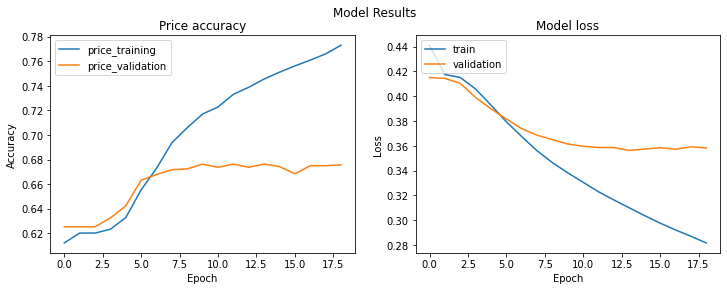

In [62]:
plt_function_single_op(history)

## Thoughts and observation:
This gave a score on Kaggle = 0.62038.

I thought by using the two inputs I have after preprocessing them, this would give a very good results. But from the above results in the training phase, and the above figures, we can observe that there is overfitting as the accuracy is high on the training part from the dataset and the loss is low. But on the validation part, the accuracy almost started to be the same value, and the loss is high. Although the number of the batch size isn't small. Besides, I prevented the overfitting on the training dataset by monitoring the validation loss value which is the loss value on the validation dataset. Then, wait if the validation loss increased 5 times, the model stops the training, and use the final gradients it reached in the prediction on the text after cleaning and translating it to be useful and in one language, and on the image data after making the same preprocessing for the images on it. But this didn't work well, and overfitting is happened. So, by training the model I reached accuracy = 0.6756, and the resultant accuracy on Kaggel is 0.62038. Besides, the accuracy on the training part reached 0.7732, so it is obvious that there is overfitting in this trial.

## Plan for the next trial:
I will use two inputs (text data and image data) by using embedded layer then average the result from it with the text input, and by using 2 layers to extract the features from the images after making preprocessing on them. I will use convolution layer by 400 hidden layers and filter size = 16x16, then use max pooling layer by window size = 16x16, so it gets the max value from the window of the max pooling. Then, concatinate both parts to be used together in the dense layer to predict the output, and as I mentioned before I used softmax activation function as our problem is multi class classification. 
Besides, I will predict the both outputs which are the type and the price. By making their contribution in the predicted class is equal. So, this trial is Multi-modality, Multi-objective trial.

## 7. Multi-objective learning (predicting both price and type) with using Multi-modality learning by using both text and image data


In [63]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding layer that takes the input with the vacab size and max_len
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d layer with 400 hidden layers and filter size 16x16 then max pooling layer with window size 16x16
cov = Conv2D(400, (16, 16))(in_image)
pl = MaxPool2D((16, 16))(cov)

# make flatten for the output of the max pooling so we can use it to the dense layer
flattened = Flatten()(pl)


# combine both networks from the image's layers and text's layers
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# for each predictions add a dense layer to make the classification with softmax activation as it is multi class classification
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_outputs = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each prediction task and metrics is accuracy, with making the contribution of 
# the predicted values in the final output by 50% for each prediction (type - price)
model_outputs.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


# display the model with the layers and number of parameters in each layer
model_outputs.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 49, 49, 400)  205200      ['input_9[0][0]']                
                                                                                                  
 embedding_4 (Embedding)        (None, 100, 100)     3000000     ['input_8[0][0]']                
                                                                                            

In [64]:
# make training for the model on the training dataset with making 60 epochs which means 60 iteration over the training dataset,
# take in each iteration 128 sample point (batch size), with splitting the training into train and validation by making the 
# validation size = 20%, put early stopping to monitor the val_loss, the training using the two inputs we have, and the outputs
# are two outputs we have (type - price)
history = model_outputs.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=60,
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5, )
    ],
    verbose=1
)

Epoch 1/60
48/48 [==============================] - 11s 210ms/step - loss: 1.2815 - price_loss: 0.8944 - type_loss: 1.6685 - price_sparse_categorical_accuracy: 0.6155 - type_sparse_categorical_accuracy: 0.7377 - val_loss: 0.9146 - val_price_loss: 0.8331 - val_type_loss: 0.9960 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/60
48/48 [==============================] - 10s 204ms/step - loss: 0.9296 - price_loss: 0.8371 - type_loss: 1.0222 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9004 - val_price_loss: 0.8295 - val_type_loss: 0.9712 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/60
48/48 [==============================] - 10s 205ms/step - loss: 0.9245 - price_loss: 0.8334 - type_loss: 1.0155 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.8980 - val_price_loss: 0.8268 

In [65]:
# make model prediction on the both data types we have in the inputs in the test data set, and get the max class probability to 
# be the predicted class
y_predict = model_outputs.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)


# probabilities
type_predicted = y_predict['type']
print(type_predicted)

# categories
type_category_predicted = np.argmax(type_predicted, axis=1)
print(type_category_predicted)

[[0.71299374 0.23091859 0.05608762]
 [0.71299374 0.23091859 0.05608762]
 [0.71299374 0.23091859 0.05608762]
 ...
 [0.71299374 0.23091859 0.05608762]
 [0.71299374 0.23091859 0.05608762]
 [0.71299374 0.23091859 0.05608762]]
[0 0 0 ... 0 0 0]
[[0.00080111 0.7396455  0.00554236 ... 0.00076173 0.02396438 0.00146104]
 [0.00080111 0.7396455  0.00554236 ... 0.00076173 0.02396438 0.00146104]
 [0.00080111 0.7396455  0.00554236 ... 0.00076173 0.02396438 0.00146104]
 ...
 [0.00080111 0.7396455  0.00554236 ... 0.00076173 0.02396438 0.00146104]
 [0.00080111 0.7396455  0.00554236 ... 0.00076173 0.02396438 0.00146104]
 [0.00080111 0.7396455  0.00554236 ... 0.00076173 0.02396438 0.00146104]]
[1 1 1 ... 1 1 1]


In [66]:
# save the predicted into CSV file and save the price only to try on Kaggle
pd.DataFrame(
    {'id': df_test.index,
     'price': price_category_predicted}
).to_csv('trial predict both.csv', index=False)

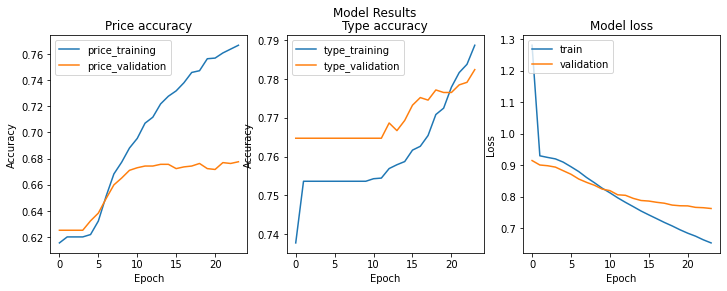

In [67]:
plt_function_multi_op(history)

## Thoughts and observation:
This gave a score on Kaggle = 0.62038.

My expectations were that this model won't give a good results in the training phase or in the test phase. But its results are good as from the above graphs and results in the training phase I don't think there was overfitting on the training data happened. Besides, the number of the batch size isn't small. Besides, I prevented the overfitting on the training dataset by monitoring the validation loss value which is the loss value on the validation dataset. Then, wait if the validation loss increased 5 times, the model stops the training, and use the final gradients it reached in the prediction on the text after cleaning and translating it to be useful and in one language, and on the image data after making the same preprocessing on it. So, by training the model I reached accuracy = 0.6776, and the resultant accuracy on Kaggel is 0.62038. So, this means they are close to each other, and there is overfitting or underfitting in the model. As the model stoped in the training before any overfitting happen after the epoch number 24. And all results on the prediction of both outputs are close to each other. And I think the result on Kaggle were to be better if we submitted both price and type as I made their contribution is equally in the process of the fitting the model, and in the prediction.


# Over all results: 🥰
| Trial | Score on the experimental protocol applied | Score on Kaggle |
| :--- | :----: | ---: |
| Using the text data only (single-modality learning - single-objective learning) | 0.6717 | 0.68885 |
| Using the text data only with adding LSTM layer (single-modality learning - single-objective learning) | 0.6252 | 0.62038 |
| Using the text data only with adding two layers "BiDirectional layers" (single-modality learning - single-objective learning) | 0.6370 | 0.4826 |
| Using the image data only with convolution and max pooling layers (single-modality learning - single-objective learning) | 0.6252 | 0.62038 |
| Using the image data only with convolution, max pooling layers, and dropout layer (single-modality learning - single-objective learning) | 0.6252 | 0.62038 |
| Building a Learning model with using both inputs "text + image" data (Multi-modality learning) | 0.6756 | 0.62038 |
| Multi-objective learning (predicting both price and type) with using Multi-modality learning by using both text and image data | 0.6776 | 0.62038 |

# Conclusion:
The best model I had that gave the best results on Kaggle by prediction on the unseen dataset (test dataset) is Using the text data only (single-modality learning - single-objective learning) that gave 0.68885 in the public and 0.69809 in the private.
This doesn't mean it is the best thing to do with problem, but as future work we can use NAS algorihm to search for the best hyperparameters in the neural networks, and try different preprocessing methods to do on the text data, and on the image data.

-------------------------------------------------------------------------------------------------------------------------------

# Questions

## Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?
* No, fully connected model isn't a good one for sequential data.
* As it can't make good feature extraction from the sequential data, and in the fully connected layers, all input nodes affect in the all output nodes, and this makes the network has a high number of weights and parameters.
* No, it is also not good for image data.
* As fully connected neural networks is not good in making feature extraction from the images like CNN. Fully connected neural networks needs weight for each input. So, if we said we have image by size 64x64x3, it will need 12288 weights in the first hidden layer, and the number of the weights will increase by each hidden layer. Besides, it the image size increased the number of the weights in the first hidden layer will be much bigger. Then, this would make many problems like the training time will be slower and it increase the ability of the model to be over fitted on the training data. 


## What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?

* Vanishing gradient means that the derivative of the cost function J with respect to the weights in every layer will be smaller and smaller while we go backpropagation.
* Explosion gradient means that the derivative of the cost function J with respect to the weights in every layer will be larger and larger while we go backpropagation.
* GRU/LSTM tries to mitigate this problems by the forget gate that is inside both of them. As the result gradient is containing the vector of activations of the forget gate, that helps the network to control the gradients values at each time step. So, this allows the GRU or LSTM to find a suitable parameter that updates the forget gate. Besides, those gates have additive function property that includes direct access to the forget gate’s activations, this property enables better balancing of gradient values during backpropagation. So, this helps in updating, and balancing the values that make the additive expression doesn't vanish or explose. As this enables the network to encourage desired behaviour from the error gradient using frequent gates update on every time step of the learning process.


## What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?
* Multi-objective/multi-task learning is the process of solving multiple tasks together at the same time with sharing inductive bias between them. This helps also in taking the advantage of similarities across multiple learning tasks.
* Multi-modality learning is the process of dealing with different modalities together, like dealing with images, and text, or dealing with audio, and text or images. The different modalities are used to train the model.
* I used them by using the text data, and image data as the inputs for the neural network. Then, make concatinate for their parts together in the network, so this is the multi-modality learning. For multi-objective/multi-task learning, I used it in making predictions for the two labels we have in this problem which are the type and the price category for the apartment/house. So, make the neural network predict both of them.



## What is the difference among xgboost, lightgbm and catboost?
* Xgboost is a scalable, distributed gradient-boosted decision tree. It provides parallel tree boosting. It is a decision tree ensemble learning algorithm. It is highly accurate implementation of gradient boosting that pushes the limits of computing power for boosted tree algorithms.
* Lightgbm is a gradient boosting framework that makes use of tree based learning algorithms that is considered to be a very powerful algorithm when it comes to computation. It is considered to be a fast processing algorithm.
* Catboost is a gradient boosting algorithm, it builds symmetric or balanced trees. Leaves in every step are split using the same condition. With using feature split pair which accounts for the lowest loss is selected and used for all the level’s nodes. It uses the concept of ordered boosting, a permutation-driven approach to train model on a subset of data while calculating residuals on another subset, thus preventing target leakage and overfitting. It supports all kinds of features be it numeric, categorical, or text and saves time and effort of preprocessing. 

* More differeneces: 

    1. Treat the categorical data:

        Lightgbm, and Catboost can treat the categorical features by several way, but in Xgboost the user need to treat it manually.

    2. Treat null values:
    
        Lightgbm removes them itself, Catboost can deal with the null in the numerical data but in categorical user need to treat them, and xgboost user need to treat them manually.

    3. Growing trees way:
    
        In lightgbm grow trees by leaves, in catboost grow trees by levels, and in xgboost grow trees by depth.



# References
1. https://rb.gy/2dd9ud
2. https://rb.gy/dnujqg
3. https://rb.gy/wxqjaw
4. https://rb.gy/qjlcba
5. https://rb.gy/t7wo8i
6. https://rb.gy/ezu1ur
